Successfully loaded data from listings.csv


Analyzing the dataset...

Number of rows: 426
Number of columns: 18
Number of columns with missing data: 5

Data types of each column:
+----+--------------------------------+-----------+
|    |             Column             | Data Type |
+----+--------------------------------+-----------+
| 0  |               id               |   int64   |
| 1  |              name              |  object   |
| 2  |            host_id             |   int64   |
| 3  |           host_name            |  object   |
| 4  |      neighbourhood_group       |  float64  |
| 5  |         neighbourhood          |  object   |
| 6  |            latitude            |  float64  |
| 7  |           longitude            |  float64  |
| 8  |           room_type            |  object   |
| 9  |             price              |  float64  |
| 10 |         minimum_nights         |   int64   |
| 11 |       number_of_reviews        |   int64   |
| 12 |          last_review           | 

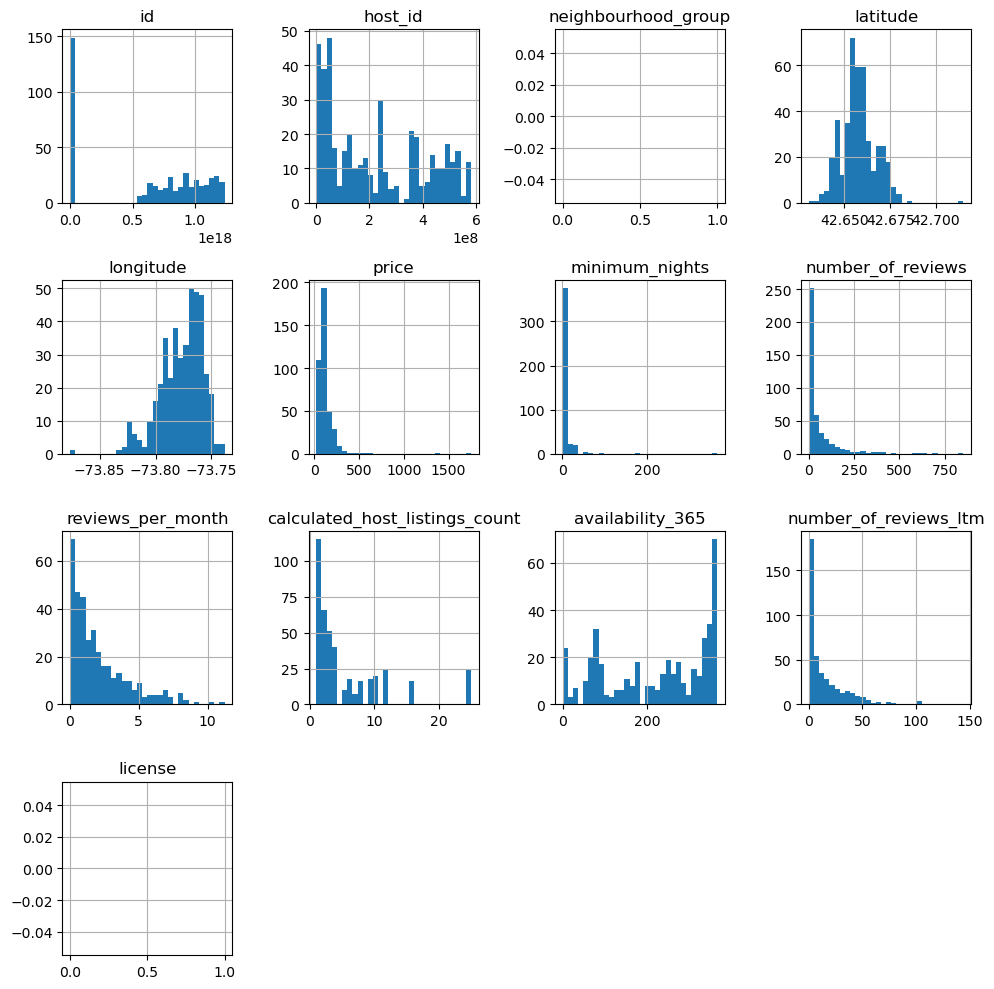

+---+---------+--------------------------------------------+----------+-----------+---------------+
|   |   id    |                    name                    | host_id  | host_name | neighbourhood |
+---+---------+--------------------------------------------+----------+-----------+---------------+
| 0 | 2992450 |         Luxury 2 bedroom apartment         | 4621559  |  Kenneth  |  THIRD WARD   |
| 1 | 3820211 | Restored Precinct in Center Sq. w/Parking  | 19648678 |   Terra   |  SIXTH WARD   |
| 2 | 5651579 | Large studio apt  by Capital Center & ESP@ | 29288920 |   Gregg   |  SECOND WARD  |
+---+---------+--------------------------------------------+----------+-----------+---------------+
+---+----------+-----------+-----------------+-------+----------------+
|   | latitude | longitude |    room_type    | price | minimum_nights |
+---+----------+-----------+-----------------+-------+----------------+
| 0 | 42.65789 | -73.7537  | Entire home/apt | 70.0  |       28       |
| 1 | 42.652

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline 
from tabulate import tabulate
import seaborn as sns
%matplotlib inline

# Function to read the CSV file and handle errors
def load_data(file_path):
    try:
        df = pd.read_csv(file_path)
        print(f"Successfully loaded data from {file_path}\n")
        return df
    except FileNotFoundError:
        print(f"Error: The file {file_path} was not found.")
        return None
    except pd.errors.EmptyDataError:
        print("Error: The file is empty.")
        return None
    except pd.errors.ParserError:
        print("Error: The file could not be parsed.")
        return None

# Function to display data information
def display_data_info(df):
    print("\nAnalyzing the dataset...\n")
    
    # 1. Number of rows and columns
    num_rows, num_columns = df.shape
    print(f"Number of rows: {num_rows}")
    print(f"Number of columns: {num_columns}")
    
    # 2. Number of columns with missing data
    missing_data_columns = df.isna().sum()
    num_missing_columns = (missing_data_columns > 0).sum()
    print(f"Number of columns with missing data: {num_missing_columns}")
    
    # 3. Data type of each column
    print("\nData types of each column:")
    print(tabulate(df.dtypes.reset_index(), headers=['Column', 'Data Type'], tablefmt='pretty'))
    
    # 4. Summary statistics for numerical data
    print("\nSummary statistics for numerical data:")
    print(tabulate(df.describe(), headers='keys', tablefmt='pretty'))
    
    # 5. Summary statistics for categorical data
    print("\nSummary statistics for categorical data:")
    print(tabulate(df.describe(include='object'), headers='keys', tablefmt='pretty'))
    
    # 6. Percentage of missing values per column
    missing_percentage = (df.isna().sum() / len(df)) * 100
    print("\nPercentage of missing values per column:")
    print(tabulate(missing_percentage.reset_index(), headers=['Column', 'Missing Percentage'], tablefmt='pretty'))
    
    # 7. Number of duplicate rows
    duplicate_rows = df.duplicated().sum()
    print(f"\nNumber of duplicate rows: {duplicate_rows}")
    
    # 8. Unique values per column
    print("\nNumber of unique values per column:")
    unique_counts = df.nunique()
    print(tabulate(unique_counts.reset_index(), headers=['Column', 'Unique Values'], tablefmt='pretty'))
    
    # 9. Correlation matrix for numerical columns
    print("\nCorrelation matrix for numerical columns:")
    numeric_df = df.select_dtypes(include=[np.number])  # Select only numeric columns
    print(tabulate(numeric_df.corr(), headers='keys', tablefmt='pretty'))
    
    '''
    # 10. Value counts for categorical columns
    print("\nValue counts for categorical columns:")
    for col in df.select_dtypes(include=['object']).columns:
        print(f"\nValue counts for {col}:")
        print(tabulate(df[col].value_counts().reset_index(), headers=['Value', 'Count'], tablefmt='pretty'))
    '''
    
    print("\nData analysis completed.\n")

# Function to plot histograms for numerical columns
def plot_numerical_histograms(df):
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    df[numeric_columns].hist(figsize=(10, 10), bins=30)
    plt.tight_layout()
    plt.show()

# Main execution
file_path = 'listings.csv'
df = load_data(file_path)

if df is not None:
    display_data_info(df)
    plot_numerical_histograms(df)
    
def remove_columns_with_all_missing(df):
    """
    Remove columns from the DataFrame that have 100% missing data.

    Parameters:
    df (pd.DataFrame): The input DataFrame.

    Returns:
    pd.DataFrame: A DataFrame with columns having 100% missing data removed.
    """
    # Drop columns with all missing values
    cleaned_df = df.dropna(axis=1, how='all')
    
    return cleaned_df

# data after removing empty columns 
new_df = remove_columns_with_all_missing(df)

# Convert 'last_review' column to datetime and extract date only  using .loc
new_df.loc[:, 'last_review'] = pd.to_datetime(new_df['last_review'], errors='coerce').dt.date

    
# Function to display DataFrame in chunks of 3 rows and 5 columns
def display_dataframe_in_chunks(new_df, rows=3, cols=5):
    total_columns = new_df.shape[1]
    
    # Loop through the DataFrame in chunks of columns
    for start_col in range(0, total_columns, cols):
        end_col = min(start_col + cols, total_columns)
        
        # Display the current chunk of columns and the first specified number of rows
        print(tabulate(new_df.iloc[:rows, start_col:end_col], headers='keys', tablefmt='pretty'))
        
        # Check if there are more columns to display
        if end_col < total_columns:
            user_input = input("Do you want to see the next 5 columns? (yes/no): ").strip().lower()
            if user_input != 'yes':
                print("Exiting...")
                break
        else:
            print("No more columns to display.")
            break

# Call the function to display the DataFrame
display_dataframe_in_chunks(new_df)




